In [1]:
from datasets import load_dataset

# SST-5 (five classes)
ds5 = load_dataset("SetFit/sst5")

d:\ai-notebook\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\ai-notebook\venv\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Vin Sen\.cache\huggingface\hub\datasets--SetFit--sst5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://

In [2]:
ds5

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 8544
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 1101
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2210
    })
})

In [9]:
import pandas as pd

# Convert each split to DataFrame
train_df = pd.DataFrame(ds5['train'])
test_df = pd.DataFrame(ds5['test'])
validation_df = pd.DataFrame(ds5['validation'])

full_df = pd.concat([train_df, test_df, validation_df], ignore_index=True)

# Display basic info
print("Train DataFrame:")
print(train_df.head())
print(f"Shape: {train_df.shape}")

print("\nTest DataFrame:")
print(test_df.head())
print(f"Shape: {test_df.shape}")

print("\nValidation DataFrame:")
print(validation_df.head())
print(f"Shape: {validation_df.shape}")

Train DataFrame:
                                                text  label     label_text
0  a stirring , funny and finally transporting re...      4  very positive
1  apparently reassembled from the cutting-room f...      1       negative
2  they presume their audience wo n't sit still f...      1       negative
3  the entire movie is filled with deja vu moments .      2        neutral
4  this is a visually stunning rumination on love...      3       positive
Shape: (8544, 3)

Test DataFrame:
                                                text  label     label_text
0     no movement , no yuks , not much of anything .      1       negative
1  a gob of drivel so sickly sweet , even the eag...      0  very negative
2  ` how many more voyages can this limping but d...      2        neutral
3  so relentlessly wholesome it made me want to s...      2        neutral
4  gangs of new york is an unapologetic mess , wh...      0  very negative
Shape: (2210, 3)

Validation DataFrame:
         

In [11]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11855 entries, 0 to 11854
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        11855 non-null  object
 1   label       11855 non-null  int64 
 2   label_text  11855 non-null  object
dtypes: int64(1), object(2)
memory usage: 278.0+ KB


In [12]:
full_df.describe()

,label
count,11855.000000
mean,2.055251
std,1.287924
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [13]:
# Cross-tabulation to see the relationship
crosstab = pd.crosstab(full_df['label'], full_df['label_text'], margins=True)
print("\nCross-tabulation of label vs label_text:")
print(crosstab)


Cross-tabulation of label vs label_text:
label_text  negative  neutral  positive  very negative  very positive    All
label                                                                       
0                  0        0         0           1510              0   1510
1               3140        0         0              0              0   3140
2                  0     2242         0              0              0   2242
3                  0        0      3111              0              0   3111
4                  0        0         0              0           1852   1852
All             3140     2242      3111           1510           1852  11855


In [21]:
# Display samples in a cleaner format
for label in sorted(full_df['label'].unique()):
    label_data = full_df[full_df['label'] == label].iloc[0]
    
    print(f"📝 Label {label} - {label_data['label_text'].upper()}")
    print(f"Text: {label_data['text']}")
    print()

📝 Label 0 - VERY NEGATIVE
Text: final verdict : you 've seen it all before .

📝 Label 1 - NEGATIVE
Text: apparently reassembled from the cutting-room floor of any given daytime soap .

📝 Label 2 - NEUTRAL
Text: the entire movie is filled with deja vu moments .

📝 Label 3 - POSITIVE
Text: this is a visually stunning rumination on love , memory , history and the war between art and commerce .

📝 Label 4 - VERY POSITIVE
Text: a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror films



Text Length Statistics:
count    11855.000000
mean       102.742218
std         51.019918
min          4.000000
25%         63.000000
50%         99.000000
75%        137.000000
max        283.000000
Name: text_length, dtype: float64

Shortest text: 4 characters
Longest text: 283 characters
Average text length: 102.74 characters

Shortest text example:
'eh .'

Longest text example:
'... spiced with humor -lrb- ' i speak fluent flatula , ' advises denlopp after a rather , er , bubbly exchange with an alien deckhand -rrb- and witty updatings -lrb- silver 's parrot has been replaced with morph , a cute alien creature who mimics everyone and everything around -rrb-'


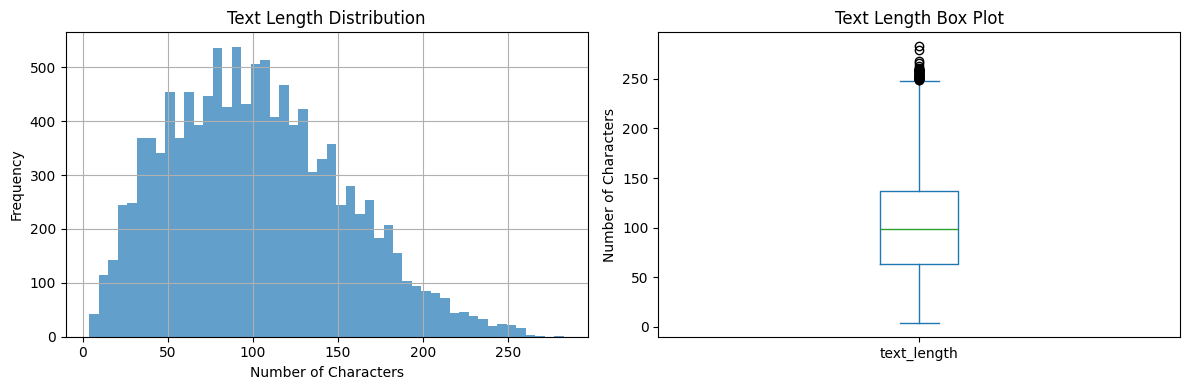

In [23]:
# Calculate text lengths
full_df['text_length'] = full_df['text'].str.len()

# Display basic statistics about text lengths
print("Text Length Statistics:")
print("=" * 40)
print(full_df['text_length'].describe())

print(f"\nShortest text: {full_df['text_length'].min()} characters")
print(f"Longest text: {full_df['text_length'].max()} characters")
print(f"Average text length: {full_df['text_length'].mean():.2f} characters")

# Show the shortest and longest texts
print(f"\nShortest text example:")
shortest_idx = full_df['text_length'].idxmin()
print(f"'{full_df.loc[shortest_idx, 'text']}'")

print(f"\nLongest text example:")
longest_idx = full_df['text_length'].idxmax()
print(f"'{full_df.loc[longest_idx, 'text']}'")

# Plot text length distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
full_df['text_length'].hist(bins=50, alpha=0.7)
plt.title('Text Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
full_df['text_length'].plot(kind='box')
plt.title('Text Length Box Plot')
plt.ylabel('Number of Characters')

plt.tight_layout()
plt.show()

In [28]:
full_df

,text,label,label_text,text_length
0,"a stirring , funny and finally transporting re...",4,very positive,103
1,apparently reassembled from the cutting-room f...,1,negative,78
2,they presume their audience wo n't sit still f...,1,negative,225
3,the entire movie is filled with deja vu moments .,2,neutral,49
4,this is a visually stunning rumination on love...,3,positive,104
...,...,...,...,...
11850,`` the ring '' is pretty much an english-langu...,2,neutral,131
11851,"smart , provocative and blisteringly funny .",3,positive,44
11852,"this one is definitely one to skip , even for ...",0,very negative,69
11853,charles ' entertaining film chronicles seinfel...,3,positive,192


In [33]:
len([length for length in full_df['text'].str.len() if length >= 100])

5858

In [34]:
len([length for length in full_df['text'].str.len() if length < 100])

5997

In [35]:
5997 + 5858

11855

In [36]:
sum = 0
for word in full_df['text'].str.split():
    sum += len(word)

avg = sum / len(full_df['text'])
avg

19.16870518768452

In [37]:
highest_word_count = full_df['text'].str.split().apply(len).max()
print(f"Highest word count in a single text: {highest_word_count}")

Highest word count in a single text: 56
